In [8]:
import pandas as pd

# 1. 데이터 로드 및 기본 정보 확인
# CSV 파일 불러오기
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('tested.csv')  # 'your_file.csv' 대신 업로드한 파일명 사용

Saving tested.csv to tested (1).csv


In [16]:
# 피처 추출 (독립변수 확인해보기)
features_and_dtypes = df.dtypes
print(features_and_dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [17]:
# 데이터프레임의 상위 5개 행을 출력하여 데이터의 기본 구조를 확인하시오.
# (빈칸: df.______())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


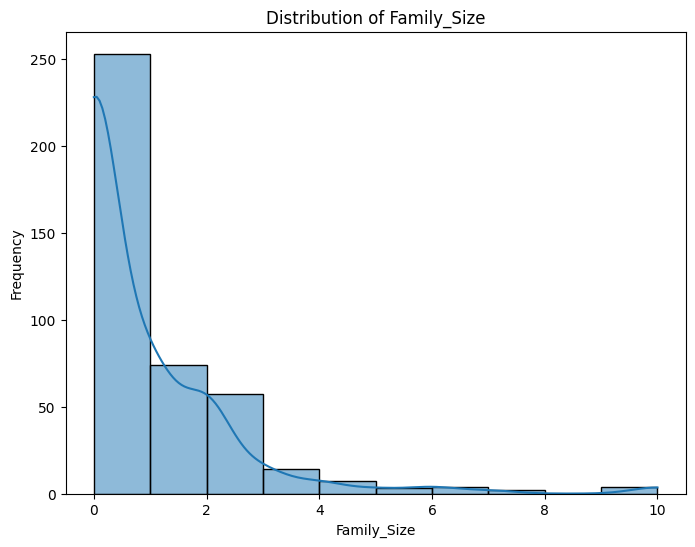

In [22]:
# 2. 피처 엔지니어링 1: 가족 수 변수 생성
# SibSp (형제자매 / 배우자 수) + Parch (부모 / 자녀 수) 값을 더하여 새로운 가족 수 변수를 만드시오.
# 변수 이름은 'Family_Size'로 지정하세요.
df['Family_Size'] = df['SibSp'] + df['Parch']
# Family_Size 변수의 분포를 확인하고, 전체적인 분포가 어떤지 설명하시오.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(df['Family_Size'], bins=10, kde=True)
plt.title('Distribution of Family_Size')
plt.xlabel('Family_Size')
plt.ylabel('Frequency')
plt.show()

분포설명:family size가 오른쪽으로 긴 꼬리를 가지는 것을 보아 탐승객이 0에서 4사이에 분포 되어있고 5명 이상은 드물다는 것을 의미함

In [26]:
# 3. 피처 엔지니어링 2: 이름에서 호칭 추출
# 이름(`Name`)에서 Mr, Mrs, Miss 등 호칭을 추출하여 새로운 'Title' 변수를 생성하세요.
# 힌트: 이름 문자열에서 콤마(,)와 점(.) 사이의 텍스트를 추출하면 됨.
# (빈칸: df['Title'] = df['Name'].str.extract('_____', expand=False))
df['Title'] = df['Name'].str.extract(',\s*([^\.]+)\.', expand=False)
print(df[['Name', 'Title']].head())

# 생성된 Title 변수의 상위 5개 값을 출력하고, 다양한 호칭이 어떻게 구성되어 있는지 확인하세요.
print("\n호칭 분포:")
print(df['Title'].value_counts())

                                           Name Title
0                              Kelly, Mr. James    Mr
1              Wilkes, Mrs. James (Ellen Needs)   Mrs
2                     Myles, Mr. Thomas Francis    Mr
3                              Wirz, Mr. Albert    Mr
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   Mrs

호칭 분포:
Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [29]:
# 4. 피처 엔지니어링 3: 나이 그룹화
# Age 변수의 결측값을 중간값으로 채우고, 나이 범주를 나눠서 'Age_Group' 변수를 생성하세요.
# 예: 0-12 (Child), 13-18 (Teenager), 19-35 (Young_Adult), 36-60 (Adult), 60 이상 (Senior)
# (빈칸: df['Age'] = df['Age'].fillna(df['______.median()']))
df['Age'] = df['Age'].fillna(df['Age'].median())
# 나이를 그룹화하는 함수 작성
def Age_group(age):
    if age <= 12:
        return 'Child'
    elif age <= 18:
        return 'Teenager'
    elif age <= 35:
        return 'Young_Adult'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senior'

# age_group 함수를 사용하여 새로운 'Age_Group' 변수 생성
# (빈칸: df['Age_Group'] = df['Age'].apply(____))
df['Age_Group'] = df['Age'].apply(Age_group)
# 생성된 Age_Group 변수의 분포를 확인하세요.
# (빈칸: print(df['______'].value_counts()))
print(df['Age_Group'].value_counts())

Age_Group
Young_Adult    259
Adult           94
Teenager        29
Child           25
Senior          11
Name: count, dtype: int64


In [31]:
# 5. 피처 엔지니어링 4: 요금 범주화
# Fare 변수를 기준으로 값이 높은 승객과 낮은 승객을 구분하기 위해 4개의 구간으로 나누어 'Fare_Bin' 변수를 생성하세요.
# 힌트: pd.qcut() 함수를 사용하여 구간 나누기
# (빈칸: df['Fare_Bin'] = pd.qcut(df['____'], _____))
df['Fare_Bin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very_High'])
# Fare_Bin 변수의 빈도를 출력하고, 값의 분포를 확인하세요.
# (빈칸: print(df['______'].value_counts()))
print(df['Fare_Bin'].value_counts())

Fare_Bin
Low          114
High         105
Very_High    102
Medium        96
Name: count, dtype: int64


In [34]:
# 6. 피처 엔지니어링 5: 객실 여부
# Cabin 변수가 결측인 경우와 아닌 경우를 구분하여 'Cabin_Known' 변수를 생성하세요.
# Cabin 값이 존재하면 1, 결측이면 0으로 설정하세요.
# (빈칸: df['Cabin_Known'] = df['Cabin'].notna().astype(____))
df['Cabin_Known'] = df['Cabin'].notna().astype(int)

# 생성된 Cabin_Known 변수의 빈도를 출력하고, 객실 여부와 생존율 간의 관계를 분석하세요.
# (빈칸: print(df['______'].value_counts()))
print("Cabin_Known 빈도:\n", df['Cabin_Known'].value_counts())
print("\nCabin 여부에 따른 생존율:\n", df.groupby('Cabin_Known')['Survived'].mean())


Cabin_Known 빈도:
 Cabin_Known
0    327
1     91
Name: count, dtype: int64

Cabin 여부에 따른 생존율:
 Cabin_Known
0    0.330275
1    0.483516
Name: Survived, dtype: float64


In [35]:
# 7. 피처 엔지니어링 6: 승선 지역
# 'Embarked' 변수를 더미 변수로 변환하여 승선 지역(S, C, Q)을 기준으로 각각의 더미 변수를 생성하세요.
# (빈칸: df = pd.get_dummies(df, columns=['____'], drop_first=True))
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# 변환된 데이터프레임의 상위 5개 행을 출력하여 더미 변수 생성 결과를 확인하세요.
# (빈칸: df.______())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Family_Size,Title,Age_Group,Fare_Bin,Cabin_Known,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,0,Mr,Young_Adult,Low,0,True,False
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,1,Mrs,Adult,Low,0,False,True
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,0,Mr,Senior,Medium,0,True,False
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,Mr,Young_Adult,Medium,0,False,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,2,Mrs,Young_Adult,Medium,0,False,True


In [36]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Family_Size,Title,Age_Group,Fare_Bin,Cabin_Known,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,0,Mr,Young_Adult,Low,0,True,False
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,1,Mrs,Adult,Low,0,False,True
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,0,Mr,Senior,Medium,0,True,False
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,Mr,Young_Adult,Medium,0,False,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,2,Mrs,Young_Adult,Medium,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,0,Mr,Young_Adult,Medium,0,False,True
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,0,Dona,Adult,Very_High,1,False,False
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,Mr,Adult,Low,0,False,True
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,0,Mr,Young_Adult,Medium,0,False,True


## 문제

### 1. 피처엔지니어링을 통해 기대할 수 있는 효과는 무엇인지 설명하시오.

:연속형 변수를 그룹화하거나 범주형 변수를 더미변수로 변환함으로써 분포가 개선되고,유사한 피처들을 묶거나 중요한 특징들을 추출하여 단순화한다면 모델의 성능을 높일 수 있음

### 2. 새로 생성한 변수에 대해 간단히 설명하고 모델의 성능이 향상된다면 그 이유가 무엇일지 설명하시오.
:새로 생성한 변수들은 각 승객의 생존 가능성에 영향을 미칠 수 있는 정보를 제공하여 데이터 간의 상관관계를 더 잘 반영함으로써 더 높은 품질의 정보를 모델에 제공할 수 있음.

